<a href="https://colab.research.google.com/github/bharaniakella/100xdl/blob/main/ANN_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

In [100]:
A=[1,1]
B=[5,1]
n_clust=100
blur=1
a=[A[0]+np.random.randn(n_clust)*blur,A[1]+np.random.randn(n_clust)*blur]
b=[B[0]+np.random.randn(n_clust)*blur,B[1]+np.random.randn(n_clust)*blur]

labels_np=np.vstack((np.zeros((n_clust,1)),np.ones((n_clust,1))))

data_np=np.hstack((a,b))
data_np=data_np.T

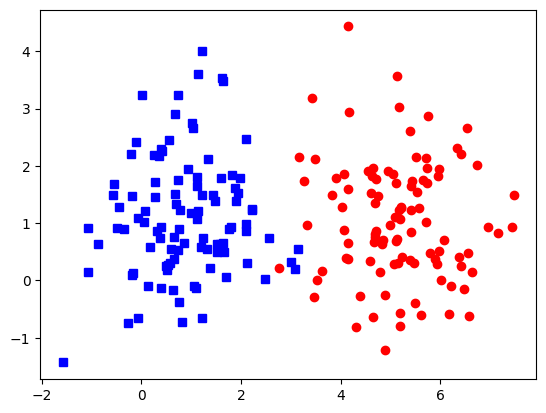

In [101]:
plt.plot(data_np[:100,0],data_np[:100,1],'bs')
plt.plot(data_np[100:,0],data_np[100:,1],'ro')
plt.show()

In [102]:
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()

In [103]:
ann_classify=nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

lr=0.05
loss_fun=nn.BCELoss()
optimizer=torch.optim.SGD(ann_classify.parameters(),lr=lr)

In [104]:
temp_data=torch.randn(5,2)
ann_classify(temp_data)

tensor([[0.6295],
        [0.6295],
        [0.7479],
        [0.6295],
        [0.6295]], grad_fn=<SigmoidBackward0>)

In [105]:
num_epochs=500
losses=torch.zeros(num_epochs)
for epochi in range(num_epochs):
  yhat=ann_classify(data)
  loss=loss_fun(yhat,labels)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

predictions=ann_classify(data)

In [106]:
predlabels=predictions>0.5
np.where(predlabels!=labels)

(array([  4,   5,  23,  24,  25,  27,  34,  35,  62,  66,  76,  83,  85,
        107, 109, 122, 129, 149, 158, 180]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [107]:
misclassified=np.where(predlabels!=labels)[0]
total_acc=100-100*len(misclassified)/(2*n_clust)
total_acc

90.0

In [108]:
len(np.where(predlabels==labels)[0])/(2*n_clust)

0.9

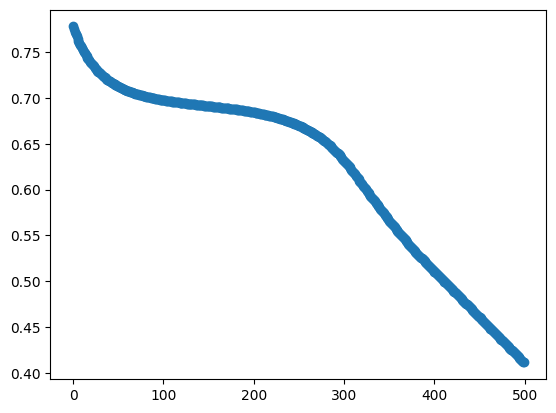

In [109]:
plt.plot(losses.detach(),'o')
plt.show()

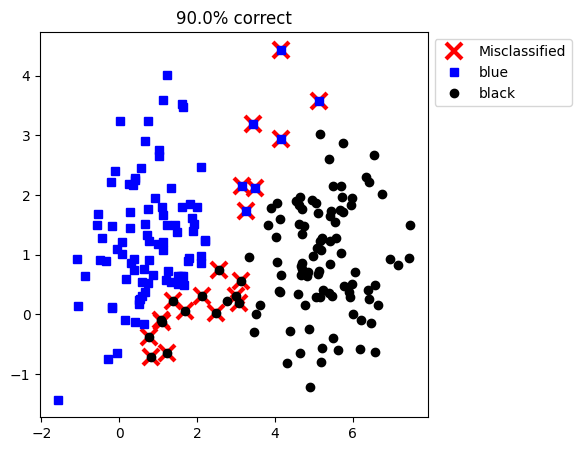

In [111]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{total_acc}% correct')
plt.show()